In [1]:
import utils.constants as consts

from model.CRISM_inference import infer_CRISM_datapoint
from model.hapke_model import get_USGS_r_mixed_hapke_estimate, get_mixed_SSA
from utils.plotting import *
from model.inference import convert_USGS_arr_to_dict

F = PREPROCESSED_DATA + "CRISM/frt00010628.pickle"
F2 = PREPROCESSED_DATA + "CRISM/frt00010628_angles.pickle"
img = get_CRISM_data(F)
with open(F2, 'rb') as handle:
    angle_img = pickle.load(handle)

print("CRISM image size " + str(img.shape))


CRISM image size (450, 601, 269)


In [19]:


num_iterations = 10000

row_i = 50
col_i = 50

d = img[row_i, col_i]
from model.inference import cos_img
angles = cos_img(angle_img[row_i, col_i][:2])
seed = 31
pixel_num = 200
d_seeds_index = d, angles, seed, pixel_num


In [20]:
m, D = infer_CRISM_datapoint(d_seeds_index, 
                             iterations=num_iterations, 
                             V=50, 
                             C=10)

200  datapoint finished.


OrderedDict([('augite', 0), ('enstatite', 0), ('labradorite', 0), ('olivine (Fo51)', 1)])
OrderedDict([('augite', 100), ('enstatite', 100), ('labradorite', 100), ('olivine (Fo51)', 100)])


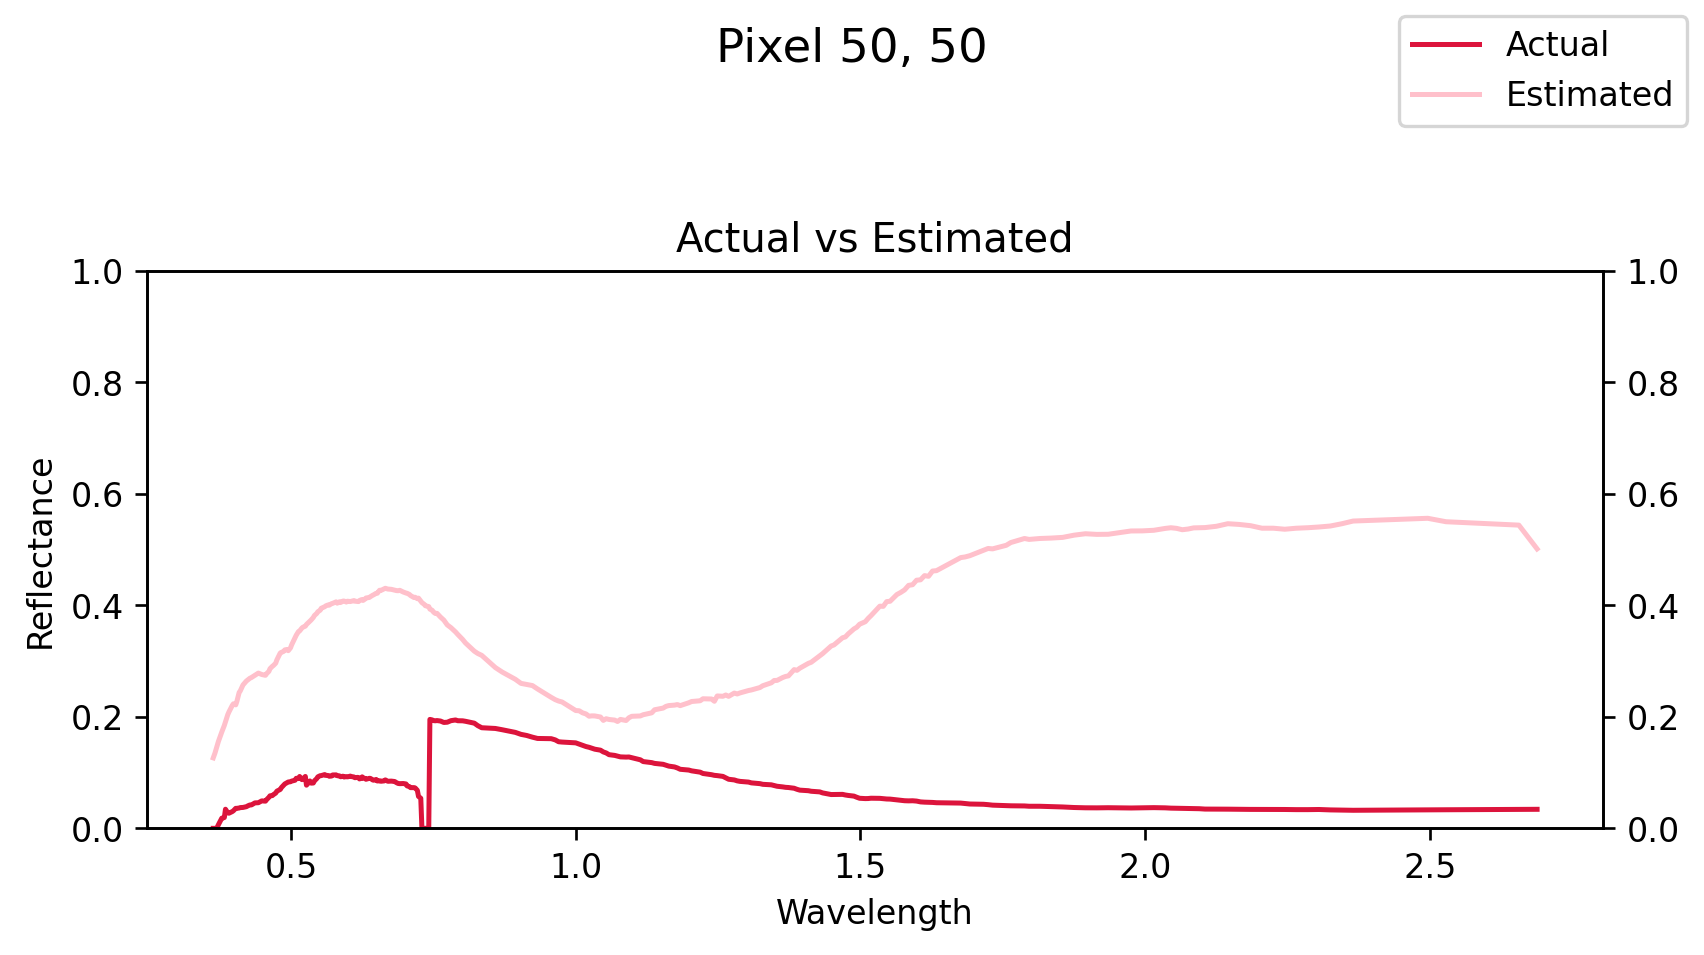

In [18]:
dict_m = convert_USGS_arr_to_dict(m)
dict_d = convert_USGS_arr_to_dict(D)
print(dict_m)
print(dict_d)

r_est = get_USGS_r_mixed_hapke_estimate(dict_m, 
                                        dict_d, 
                                        angles=angles)
r_actual = d
compare_spectra(r_est, r_actual, True, "Pixel "+ str(row_i) + ", " + str(col_i)) 

Visualize Reflectance of each endmember under USGS lab data observation angles versus CRISM pixel observation angles.

angles: [0.53905904 0.98838043]


<AxesSubplot:xlabel='Wavelength', ylabel='Reflectance'>

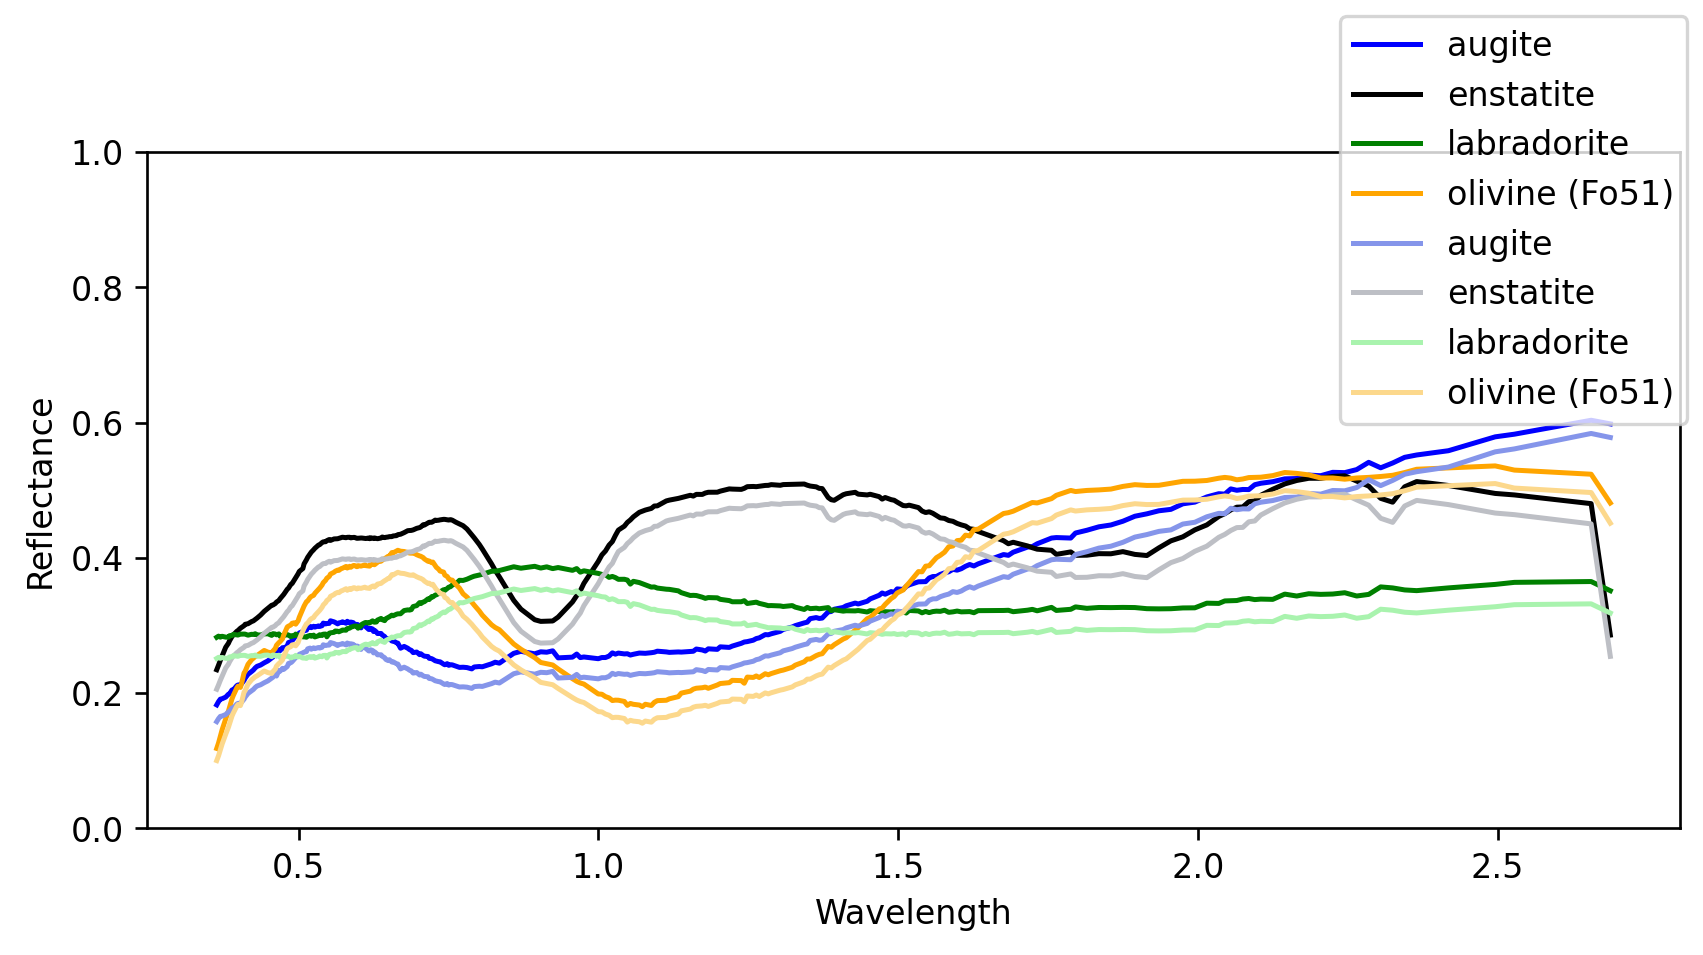

In [14]:
D = np.array([100, 100, 100, 100])
usgs_angles =[USGS_COS_INCIDENCE_ANGLE, USGS_COS_EMISSION_ANGLE]
RS = []
RS2 = []
for i in range(4):
    m = np.array([0,0,0,0])
    m[i] = 1
    RS.append(get_USGS_r_mixed_hapke_estimate(convert_USGS_arr_to_dict(m), 
                                        convert_USGS_arr_to_dict(D), 
                                        angles=angles))
    
    
    RS2.append(get_USGS_r_mixed_hapke_estimate(convert_USGS_arr_to_dict(m), 
                                        convert_USGS_arr_to_dict(D), 
                                        angles=usgs_angles))
    

names = ["augite", "enstatite", "labradorite", "olivine (Fo51)"]

print("CRISM Pixel angles (in dark colors): " + str(angles))
print("USGS angles (in light colors): " + str(usgs_angles))

plot_spectra(RS+RS2, True, names+names, 
             ["blue", "black", "green", "orange", "#8595EA", "#BDBFC5", "#A9F3AE", "#FCD88C"])
# plot_spectra(RS2, True, names, [])

angles: [0.53905904 0.98838043]


<AxesSubplot:xlabel='Wavelength', ylabel='Reflectance'>

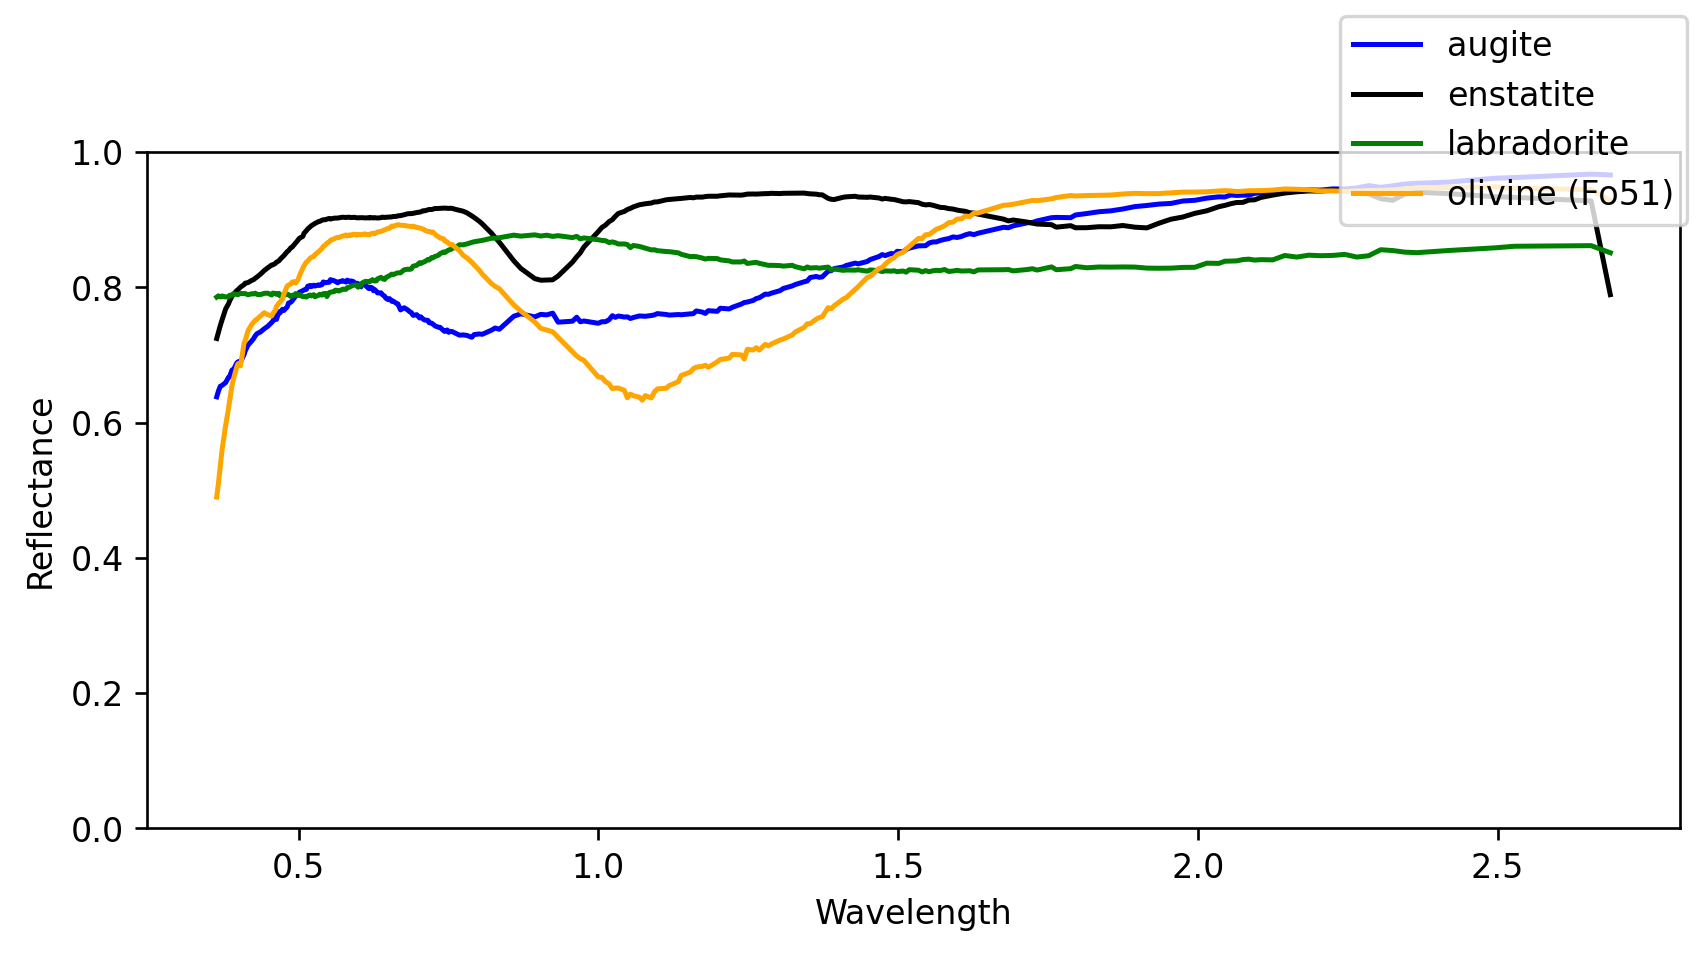

In [8]:
RS = []
for i in range(4):
    m = np.array([0,0,0,0])
    m[i] = 1
    RS.append(get_mixed_SSA(convert_USGS_arr_to_dict(m), 
                                        convert_USGS_arr_to_dict(D)))
    

names = ["augite", "enstatite", "labradorite", "olivine (Fo51)"]
print("angles: " + str(angles))
plot_spectra(RS, True, names, ["blue", "black", "green", "orange"])